In [1]:
import pandas as pd
import numpy as np
import os
import csv

In [2]:
type_of_interest = 'Study'

entity2id  = {}
id2entity  = {}
cid2entity = {}

cid = 0
with open("./train/entities.tsv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['id','entity'])
    for row_val in reader:
        type = row_val['entity'].split('::')[0]
        if type != type_of_interest:
            continue
        
        id = row_val['id']
        entity = row_val['entity']

        entity2id[entity] = int(id)
        id2entity[int(id)] = entity
        cid2entity[cid] = entity
        cid += 1

print("Number of entities in the type: {}".format(len(entity2id)))

Number of entities in the type: 8210


In [3]:
def get_entity_name_mapping(type_of_interest):
    
    attribute_file = '/fs/ess/PAS1440/ziqichen/AACT/attributes/' + type_of_interest.lower()+'_attribute.txt'
    entity2name = {}
    
    with open(attribute_file, 'r') as f:
        for line in f.readlines():
            idx, _, name = line.rstrip('\n').split(',', 2)
            idx = idx.replace(':', '::').replace('ID', '')
            entity2name[idx] = name
    
    return entity2name

In [4]:
if type_of_interest != 'Study':
    entity2name = get_entity_name_mapping(type_of_interest)

In [5]:
entity_emb = np.load('./ckpts/TransE_l2_CTKG_0/CTKG_TransE_l2_entity.npy')

idx = np.asarray(list(id2entity.keys()), dtype=int)
entity_emb = entity_emb[idx]

print(entity_emb.shape)

(8210, 200)


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(entity_emb)
# cleanup self-compare and dup-compare
s = similarity < 0.99
s = np.unique(similarity[s])

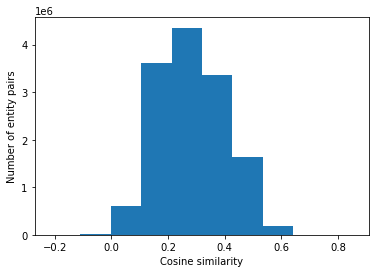

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Cosine similarity')
plt.ylabel('Number of entity pairs')
plt.hist(s)
plt.show()

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(entity_emb)
idx = np.flip(np.argsort(similarity), axis=1)

max_pairs = []
for i in range(idx.shape[0]):
    j = 1
    while (similarity[i][idx[i][j]] > 0.7):
        if type_of_interest == 'Study':
            max_pairs.append((cid2entity[idx[i][0]], cid2entity[idx[i][j]], similarity[i][idx[i][j]]))
        else:
            max_pairs.append((entity2name[cid2entity[idx[i][0]]], entity2name[cid2entity[idx[i][j]]], similarity[i][idx[i][j]]))
        j += 1

def sort_score(pair):
    return pair[2]

max_pairs.sort(reverse=True, key=sort_score)
sim_pairs = []
for i, pair in enumerate(max_pairs):
    if i % 2 == 0:
        sim_pairs.append(pair)

sim_pairs[:20]

[('Study::NCT00793624', 'Study::NCT00796653', 0.8569627),
 ('Study::NCT00720109', 'Study::NCT00866307', 0.8276812),
 ('Study::NCT01716585', 'Study::NCT01715415', 0.8198739),
 ('Study::NCT02006732', 'Study::NCT01964352', 0.81166655),
 ('Study::NCT00720109', 'Study::NCT00137111', 0.81097716),
 ('Study::NCT00782509', 'Study::NCT00796653', 0.80594385),
 ('Study::NCT00866307', 'Study::NCT00137111', 0.8027405),
 ('Study::NCT00782509', 'Study::NCT00793624', 0.8008093),
 ('Study::NCT01789255', 'Study::NCT00795769', 0.7992186),
 ('Study::NCT02216422', 'Study::NCT02219503', 0.7979843),
 ('Study::NCT02912650', 'Study::NCT01216163', 0.7950812),
 ('Study::NCT01833533', 'Study::NCT01715415', 0.7944175),
 ('Study::NCT01098747', 'Study::NCT01216163', 0.7859999),
 ('Study::NCT02706951', 'Study::NCT02675426', 0.7804427),
 ('Study::NCT01040728', 'Study::NCT00931385', 0.77864933),
 ('Study::NCT00551135', 'Study::NCT00442546', 0.777833),
 ('Study::NCT00782210', 'Study::NCT00793624', 0.7771772),
 ('Study::N